In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [6]:
# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 決定木クラスの初期化
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# k分割交差検証の実行
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)

print(scores)
print(scores.mean())
print(scores.std())

[0.904 0.912 0.956 0.939 0.956]
0.9332557056357709
0.02183187874377255


ベストスコア : 0.91
その時のパラメータ(gamma, C):(0.001, 1.0)


<AxesSubplot:>

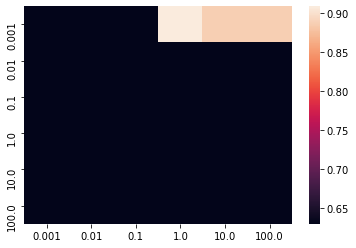

In [8]:
# インポート 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
# 乳がんのデータを読み込み 
cancer = load_breast_cancer()
# 訓練データとテストデータに分ける 
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target, 
                                                    stratify = cancer.target, 
                                                    random_state=0)

# ハイパーパラメータのすべての組み合わせでモデルを構築・検証
scores = {} 
for gamma in np.logspace(-3, 2, num=6): 
    for C in np.logspace(-3, 2, num=6):
        svm = SVC(gamma=gamma, C=C) 
        svm.fit(X_train,y_train) 
        scores[(gamma, C)] = svm.score(X_test, y_test)
# 検証結果を scoresに格納 
scores = pd.Series(scores)
# 表示 
print('ベストスコア : {:.2f}'.format(scores.max())) 
print('その時のパラメータ(gamma, C):{}'.format(scores.idxmax()))
# ヒートマップを表示。縦軸にgamma、横軸にCを表示 
sns.heatmap(scores.unstack())


In [9]:
# インポート
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 乳がんのデータを読み込み 
cancer = load_breast_cancer()
# 訓練データとテストデータに分ける 
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target, 
                                                    stratify = cancer.target, 
                                                    random_state=0)

# GridSearchCVクラスに与えるパラメータを準備
param_grid = { 'C':np.logspace(-3, 2, num=6)
             , 'gamma':np.logspace(-3, 2, num=6)}

# GridSearchCVクラスの初期化
gs = GridSearchCV(estimator=SVC(),
                 param_grid=param_grid,
                 cv=5)

# ハイパーパラメータのすべての組み合わせでモデルを構築・検証
gs.fit(X_train, y_train)

# 表示 
print('ベストスコア : {:.3f}'.format(gs.best_score_)) 
print('その時のパラメータ:{}'.format(gs.best_params_))
print('テストスコア:{:.3f}'.format(gs.score(X_test, y_test)))



ベストスコア : 0.925
その時のパラメータ:{'C': 1.0, 'gamma': 0.001}
テストスコア:0.909


In [11]:
# インポート
from sklearn.svm import SVC

# 乳がんデータの読み込み
cancer = load_breast_cancer()
# 訓練データとテストデータに分ける 
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target, 
                                                    stratify = cancer.target, 
                                                    random_state=66)

# クラスの初期化と学習
model = SVC(gamma=0.001,C=1)
model.fit(X_train, y_train)

# 表示
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9788732394366197
0.9090909090909091


In [14]:
from sklearn.metrics import confusion_matrix

# テストデータを使って予測値を算出
y_pred = model.predict(X_test)

m = confusion_matrix(y_test, y_pred)
print(m)

[[48  5]
 [ 8 82]]


In [16]:
accuracy = (m[0, 0] + m[1, 1]) / m.sum()
# 正解率 scoreと一緒
print(accuracy)

0.9090909090909091


In [20]:
# 適合率
precision = (m[1,1])/m[:,1].sum()

# 再現率
recall = (m[1,1])/m[1,:].sum()

# F1スコア
f1 = 2 * (precision * recall)/(precision + recall)

print(precision)
print(recall)
print(f1)

0.9425287356321839
0.9111111111111111
0.9265536723163842


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9425287356321839
0.9111111111111111
0.9265536723163842


In [25]:
from sklearn.linear_model import LogisticRegression

# 乳がんデータの読み込み
cancer = load_breast_cancer()
# 訓練データとテストデータに分ける 
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target, 
                                                    stratify = cancer.target, 
                                                    random_state=66)

# クラスの初期化と学習
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

# テストデータの予測確率を計算
results = pd.DataFrame(model.predict_proba(X_test), columns=cancer.target_names)

results.head()


/Users/yuichiro/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,malignant,benign
0,0.004806,0.995194
1,0.000469,0.999531
2,0.029901,0.970099
3,0.007909,0.992091
4,0.003731,0.996269


In [26]:
# 良性(benign)クラスの予測確率が0.4, 0.3, 0.15, 0.05以上なら、それぞれ1を設定する
for threshold in [0.4, 0.3, 0.15, 0.05]:
    results[f'flag_{threshold}'] = results['benign'].map(lambda x: 1 if x > threshold else 0)
    
results.head(10)

,malignant,benign,flag_0.4,flag_0.3,flag_0.15,flag_0.05
0,0.004806,0.995194,1,1,1,1
1,0.000469,0.999531,1,1,1,1
2,0.029901,0.970099,1,1,1,1
3,0.007909,0.992091,1,1,1,1
4,0.003731,0.996269,1,1,1,1
5,0.007236,0.992764,1,1,1,1
6,0.008217,0.991783,1,1,1,1
7,0.003178,0.996822,1,1,1,1
8,0.863762,0.136238,0,0,0,1
9,0.864886,0.135114,0,0,0,1


<AxesSubplot:xlabel='false positive rate', ylabel='true positive rate'>

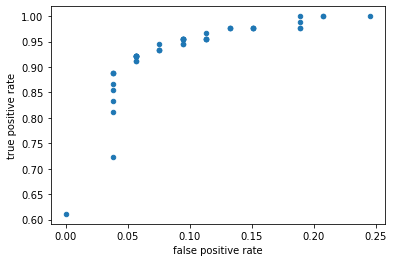

In [28]:
# ROC曲線をプロットする
# 閾値を0.01から0.99の間で50通りとして、偽陽性率と新陽性率を計算
rates = {}
for threshold in np.linspace(0.01, 0.99, num=50):
    labels = results['benign'].map(lambda x: 1 if x > threshold else 0)
    m = confusion_matrix(y_test, labels)
    rates[threshold] = {'false positive rate':m[0,1] / m[0,:].sum(),
                       'true positive rate':m[1,1] / m[1,:].sum()}
    
# 横軸をfalse positive rate, 縦軸をtrue positive rate としてプロット
pd.DataFrame(rates).T.plot.scatter('false positive rate', 'true positive rate')

In [29]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc

# 乳がんデータの読み込み
cancer = load_breast_cancer()
# 訓練データとテストデータに分ける 
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target, 
                                                    test_size=0.5, 
                                                    random_state=66)

# SVCによる予測確率の取得
model = svm.SVC(kernel='linear', probability=True, random_state=0)
model.fit(X_train, y_train)

# 予測確率を取得
y_pred = model.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'Receiver operating characteristic')

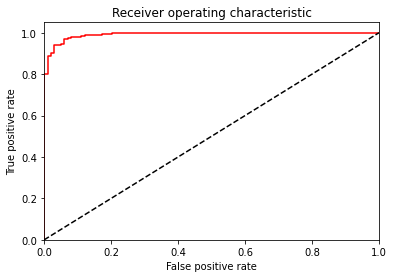

In [38]:
# 偽陽性率と真陽性率の算出
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# AUCの算出
auc = auc(fpr, tpr)

# ROC曲線の描画
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %.3f)' % auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')

In [39]:
from sklearn.datasets import load_boston

boston = load_boston()

# データを格納
X = pd.DataFrame(boston.data, columns=boston.feature_names)
# 住宅価格の中央値のデータ用意
y = pd.Series(boston.target, name='MEDV')

X.join(y).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

models = {
    'LinearRegression' : LinearRegression(),
    'Ridge': Ridge(random_state=0),
    'DecisionTreeRegressor':DecisionTreeRegressor(random_state=0),
    'LinearSVR': LinearSVR(random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'MSE')] = mean_squared_error(y_test, model.predict(X_test))
    scores[(model_name, 'MAE')] = mean_absolute_error(y_test, model.predict(X_test))
    scores[(model_name, 'MedAE')] = median_absolute_error(y_test, model.predict(X_test))
    scores[(model_name, 'R2')] = r2_score(y_test, model.predict(X_test))

pd.Series(scores).unstack()

,MAE,MSE,MedAE,R2
DecisionTreeRegressor,3.064822,24.590435,1.900000,0.675653
LinearRegression,3.627793,25.301662,2.903830,0.666272
LinearSVR,3.275385,26.799616,2.092362,0.646514
Ridge,3.618201,25.282890,2.930524,0.666520
